In [118]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

In [2]:
data=pd.read_csv('constituents_csv.csv')

In [3]:
stocks=""
for stock in data['Symbol']:
    stocks=stocks+stock+" "
stocks

'MMM AOS ABT ABBV ABMD ACN ATVI ADM ADBE AAP AMD AES AFL A APD AKAM ALK ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AEE AAL AEP AXP AIG AMT AWK AMP ABC AME AMGN APH ADI ANSS ANTM AON APA AAPL AMAT APTV ANET AJG AIZ T ATO ADSK ADP AZO AVB AVY BKR BLL BAC BBWI BAX BDX BRK.B BBY BIO TECH BIIB BLK BK BA BKNG BWA BXP BSX BMY AVGO BR BRO BF.B CHRW CDNS CZR CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE CNC CNP CDAY CERN CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CTXS CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ CPRT GLW CTVA COST CTRA CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DISCA DISCK DISH DG DLTR D DPZ DOV DOW DTE DUK DRE DD DXC EMN ETN EBAY ECL EIX EW EA LLY EMR ENPH ETR EOG EFX EQIX EQR ESS EL ETSY RE EVRG ES EXC EXPE EXPD EXR XOM FFIV FB FAST FRT FDX FIS FITB FRC FE FISV FLT FMC F FTNT FTV FBHS FOXA FOX BEN FCX GPS GRMN IT GNRC GD GE GIS GM GPC GILD GPN GL GS HAL HBI HAS HCA PEAK HSIC HES HPE HLT HOLX HD HON HRL HST HWM HPQ HUM HBAN HI

In [4]:
tickers = yf.Tickers(stocks)
df = tickers.history(period="5y")
df

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: None


Adj Close             Close                                     \
                BF.B BRK.B           A        AAL         AAP        AAPL   
Date                                                                        
2017-01-10       NaN   NaN         NaN        NaN         NaN         NaN   
2017-01-11       NaN   NaN         NaN  47.002449         NaN   28.179626   
2017-01-12       NaN   NaN   46.609417  46.480621  169.260406   28.061968   
2017-01-13       NaN   NaN   46.772713  46.045780  169.570892   28.012547   
2017-01-17       NaN   NaN   46.417294  45.176071  167.834320   28.238457   
...              ...   ...         ...        ...         ...         ...   
2022-01-04       NaN   NaN  151.190002  19.020000  237.050003  179.699997   
2022-01-05       NaN   NaN  148.600006  18.680000  236.449997  174.919998   
2022-01-06       NaN   NaN  149.119995  18.570000  241.649994  172.000000   
2022-01-07       NaN   NaN  145.149994  19.280001  238.089996  172.169998   
2022-01-10       NaN   NaN  145.160004  18.790001  234.130005  172.190002   

                                                            ...     Volume  \
                  ABBV         ABC        ABMD         ABT  ...        XEL   
Date                                                        ...              
2017-01-10         NaN         NaN         NaN         NaN  ...        NaN   
2017-01-11         NaN   74.760330  111.269997   37.842510  ...        NaN   
2017-01-12   48.475388   76.896881  112.370003   37.510883  ...  2614000.0   
2017-01-13   49.037041   77.593773  115.669998   37.704330  ...  2067900.0   
2017-01-17   48.934196   78.850014  114.019997   37.676693  ...  1898300.0   
...                ...         ...         ...         ...  ...        ...   
2022-01-04  135.160004  131.360001  361.589996  135.770004  ...  4197000.0   
2022-01-05  135.869995  132.500000  338.200012  135.160004  ...  4166000.0   
2022-01-06  135.229996  130.449997  336.440002  135.139999  ...  2296000.0   
2022-01-07  134.880005  133.119995  319.279999  135.559998  ...  2673100.0   
2022-01-10  136.389999  134.639999  306.799988  135.259995  ...  3760600.0   

                                                                               \
                 XLNX         XOM       XRAY        XYL        YUM        ZBH   
Date                                                                            
2017-01-10        NaN         NaN        NaN        NaN        NaN        NaN   
2017-01-11  2322000.0  11183700.0  1723700.0  1974100.0        NaN  2485000.0   
2017-01-12  1844900.0  10407000.0  1951000.0  1784600.0  1049900.0  1546700.0   
2017-01-13  1332200.0   8415600.0  1669900.0  2811300.0  1557700.0  1034300.0   
2017-01-17  1996500.0  13237300.0  1765400.0  1228600.0  1596000.0  1241400.0   
...               ...         ...        ...        ...        ...        ...   
2022-01-04  2937600.0  38584000.0  1438200.0   925400.0   935900.0  1360000.0   
2022-01-05  3370700.0  34033300.0  1264600.0  1090200.0   977900.0  1840500.0   
2022-01-06  2506100.0  30668500.0  1986600.0   703400.0   862400.0  1057100.0   
2022-01-07  4206900.0  23981900.0  1239100.0   765000.0   833700.0  1641000.0   
2022-01-10  4016700.0  22754800.0  1500100.0  1062700.0  1606900.0  1885500.0   

                                            
                ZBRA       ZION        ZTS  
Date                                        
2017-01-10       NaN        NaN        NaN  
2017-01-11  346100.0  2102200.0  3400500.0  
2017-01-12  456500.0  2758200.0  1513600.0  
2017-01-13  402400.0  2732500.0  2458700.0  
2017-01-17  199500.0  2889200.0  2213400.0  
...              ...        ...        ...  
2022-01-04  346000.0  1355900.0  4664000.0  
2022-01-05  403700.0  1113800.0  4749400.0  
2022-01-06  338300.0  1439600.0  3103400.0  
2022-01-07  432800.0  1289200.0  2206500.0  
2022-01-10  403400.0  1577900.0  2232200.0  

[1261 rows x 3533 columns]

In [8]:
df['Close']['AAL']['2022-01-06']

18.56999969482422

In [18]:
goals={'lastyearperformance': 60,
      'maxdrawdown': 30
      }

In [19]:
last_year=df.loc['2021-01-04':'2021-12-31']

In [20]:
df['month'] = df.index.month


In [21]:
performance=last_year['Close'].loc['2021-12-31']/last_year['Close'].loc['2021-01-04']


In [22]:
performance_list=set(performance[performance>1+(goals['lastyearperformance']/100)].index)

In [23]:
maxdrawdown=last_year['Low'].min()/last_year['High'].max()

In [24]:
maxdrawdown_list=set(maxdrawdown[maxdrawdown<(1-goals['maxdrawdown']/100)].index)

In [25]:

candidate_stocks=list(maxdrawdown_list.intersection(performance_list))
candidate_stocks

['OKE',
 'AVB',
 'JCI',
 'LLY',
 'TXT',
 'FTNT',
 'STX',
 'EOG',
 'WST',
 'KLAC',
 'ACN',
 'PSA',
 'NVDA',
 'AMAT',
 'EQR',
 'PFE',
 'NDAQ',
 'F',
 'IRM',
 'UDR',
 'SIVB',
 'RHI',
 'TSCO',
 'CBRE',
 'GOOGL',
 'MRNA',
 'ODFL',
 'FITB',
 'HD',
 'MAA',
 'NUE',
 'IPG',
 'LYV',
 'PWR',
 'OXY',
 'CDW',
 'LOW',
 'AZO',
 'REG',
 'MOS',
 'INTU',
 'DRE',
 'ANET',
 'HPQ',
 'SCHW',
 'MRO',
 'WFC',
 'FANG',
 'JNPR',
 'RJF',
 'GOOG',
 'APA',
 'DVN',
 'CMA',
 'PXD',
 'COP',
 'FRT',
 'MPC',
 'PLD',
 'BBWI',
 'DHI',
 'AMP',
 'LKQ',
 'CF',
 'TECH',
 'EXR',
 'IT',
 'MSI',
 'SPG',
 'AOS',
 'KIM']

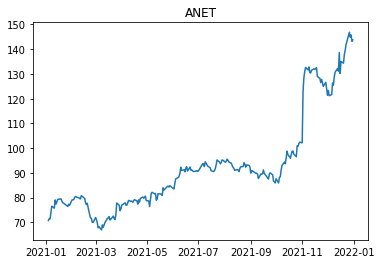

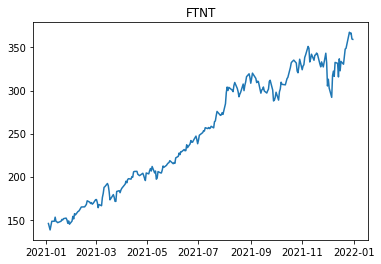

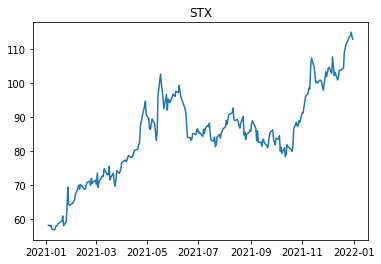

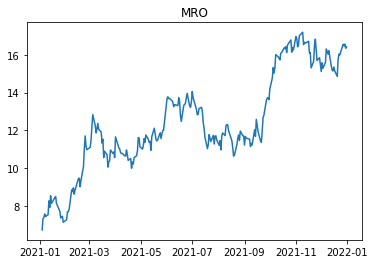

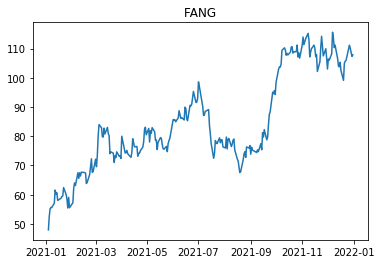

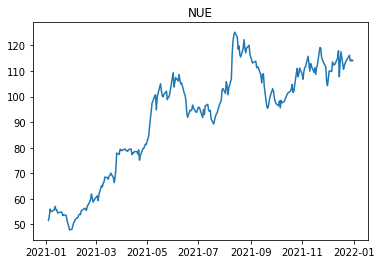

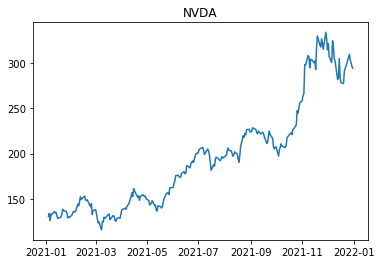

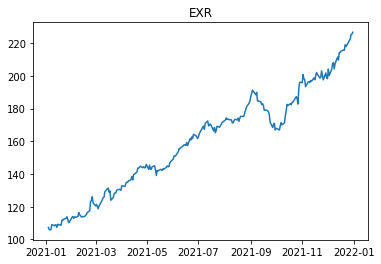

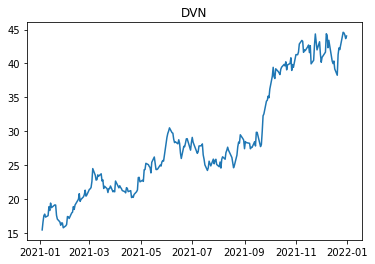

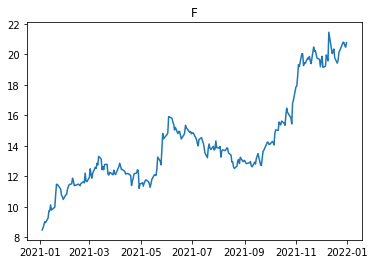

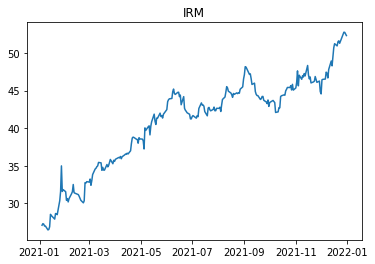

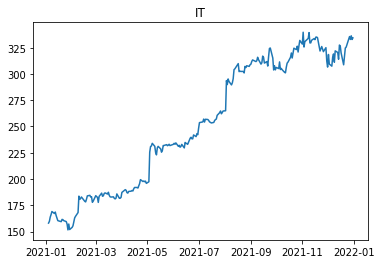

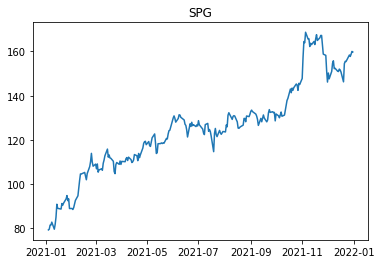

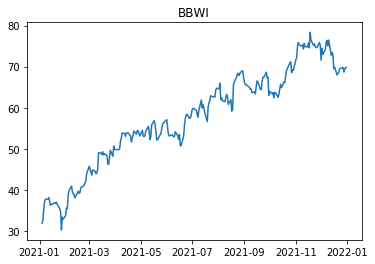

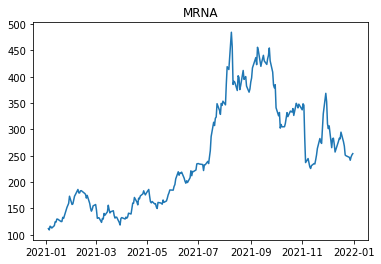

In [17]:
import matplotlib.pyplot as plt
for stock in candidate_stocks:
    plt.figure()
    plt.plot(last_year['Close'][stock])
    plt.title(stock)
    plt.show()
    #last_year['Close'][stock].plot(title="stock prices",label=stock)
    


In [27]:
last_year['Close']

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,118.001701,15.130000,154.917297,128.617126,100.585396,95.046410,316.730011,107.449150,253.328720,485.339996,...,64.744621,142.164032,39.095947,53.366348,98.747711,104.075439,152.172821,378.130005,41.861748,162.693542
2021-01-05,118.966484,15.430000,154.749908,130.207291,101.625504,96.287430,322.600006,108.778595,254.770905,485.690002,...,64.113541,143.960663,40.980091,54.895355,98.628838,104.085266,154.805740,380.570007,42.524826,163.827301
2021-01-06,122.228828,15.520000,163.690094,125.824326,100.747612,104.570740,321.609985,108.552094,257.556427,466.309998,...,65.533470,140.956299,42.025787,57.546291,102.789131,104.655716,159.217133,394.820007,47.302895,166.234024
2021-01-07,125.481255,15.380000,165.088226,130.117859,101.825890,108.471100,323.559998,109.605812,259.986450,477.739990,...,64.251595,149.430450,42.355511,57.248432,107.454628,103.859055,158.273254,409.100006,48.746071,166.084854
2021-01-08,126.376396,15.130000,167.441437,131.240936,102.360252,108.372597,324.059998,109.911087,260.934753,485.100006,...,64.843231,147.713654,42.826546,57.764725,106.365028,105.383514,157.925522,405.470001,47.507675,167.188766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,158.531204,18.170000,236.500000,180.330002,134.410004,131.899994,357.829987,141.460007,415.329987,577.679993,...,66.820000,222.779999,61.889999,55.841362,118.290001,138.009995,127.809998,606.330017,63.009998,246.509995
2021-12-28,158.970612,18.540001,238.130005,179.289993,134.389999,132.360001,357.440002,140.470001,415.269989,569.359985,...,67.620003,220.270004,61.689999,55.921204,119.519997,137.979996,128.210007,597.320007,63.110001,244.250000
2021-12-29,160.438675,18.049999,241.029999,179.380005,135.360001,133.339996,361.839996,141.190002,415.420013,569.289978,...,67.959999,217.619995,61.150002,56.540001,119.360001,138.660004,128.229996,601.119995,63.450001,247.029999


In [35]:
#std=last_year['Close'].std()
#kurt=last_year['Close'].kurtosis()
#skw=last_year['Close'].skew()
#merged=pd.DataFrame(dict(std = std, kurt = kurt,skw=skw))
#log_diff_std=np.log(last_year['Close']).diff().std()
#merged.index.name='Stock'
#merged.dropna(inplace=True)

In [105]:
values=df['Close']['AAL'].dropna().values

train,test = values[0:1000], values[1000:]
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [106]:
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [107]:
step=3
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

In [108]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(1000, 1, 3)

In [109]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 32)                1152      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

Epoch 1/100
 - 1s - loss: 1359.2823
Epoch 2/100
 - 0s - loss: 297.2149
Epoch 3/100
 - 0s - loss: 2.9347
Epoch 4/100
 - 0s - loss: 1.3445
Epoch 5/100
 - 0s - loss: 1.3056
Epoch 6/100
 - 0s - loss: 1.3008
Epoch 7/100
 - 0s - loss: 1.2526
Epoch 8/100
 - 0s - loss: 1.2506
Epoch 9/100
 - 0s - loss: 1.2506
Epoch 10/100
 - 0s - loss: 1.2269
Epoch 11/100
 - 0s - loss: 1.2009
Epoch 12/100
 - 0s - loss: 1.2016
Epoch 13/100
 - 0s - loss: 1.2234
Epoch 14/100
 - 0s - loss: 1.1874
Epoch 15/100
 - 0s - loss: 1.1665
Epoch 16/100
 - 0s - loss: 1.2098
Epoch 17/100
 - 0s - loss: 1.1954
Epoch 18/100
 - 0s - loss: 1.1839
Epoch 19/100
 - 0s - loss: 1.1664
Epoch 20/100
 - 0s - loss: 1.1531
Epoch 21/100
 - 0s - loss: 1.1237
Epoch 22/100
 - 0s - loss: 1.1098
Epoch 23/100
 - 0s - loss: 1.1348
Epoch 24/100
 - 0s - loss: 1.1316
Epoch 25/100
 - 0s - loss: 1.1312
Epoch 26/100
 - 0s - loss: 1.1203
Epoch 27/100
 - 0s - loss: 1.0888
Epoch 28/100
 - 0s - loss: 1.0960
Epoch 29/100
 - 0s - loss: 1.1060
Epoch 30/100
 - 0s

In [111]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)


0.8819445822834968


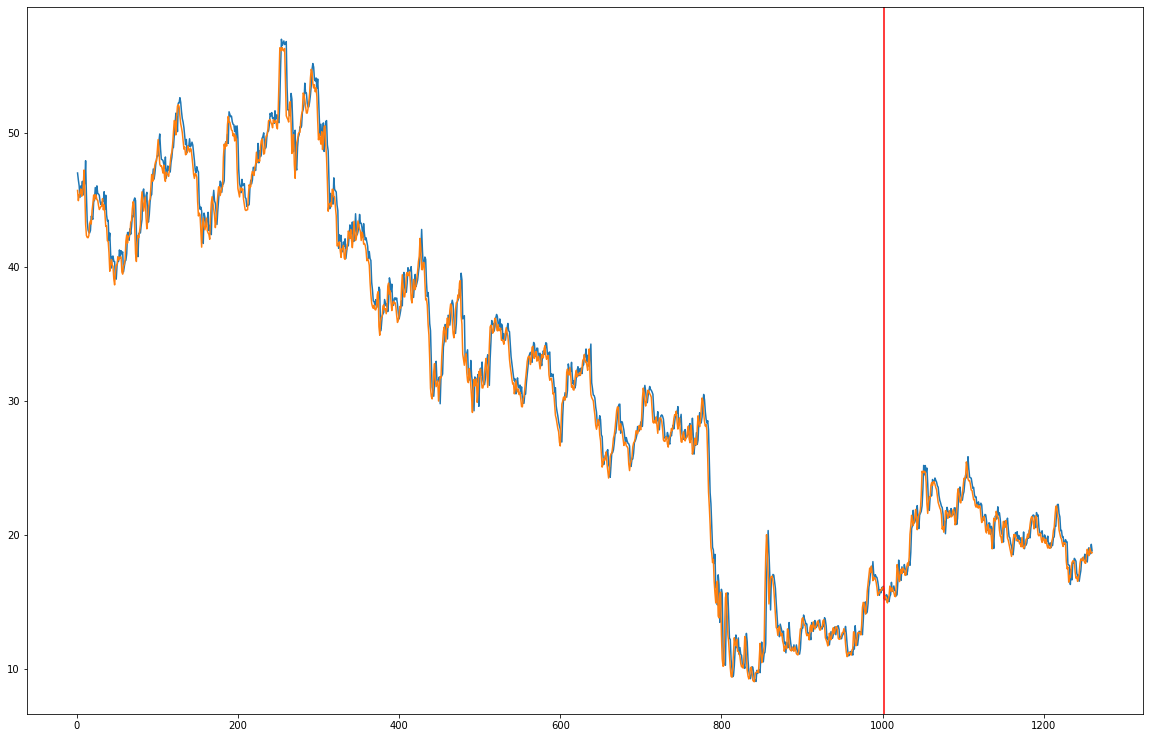

In [113]:
d=df['Close']['AAL'].reset_index().dropna()
d=d.drop(columns='Date')
index = d.index.values
plt.rcParams["figure.figsize"] = (20,13)
plt.plot(index,d)
plt.plot(index,predicted)
plt.axvline(d.index[1000], c="r")
plt.show() 

Epoch 1/100
 - 0s - loss: 1.5971
Epoch 2/100
 - 0s - loss: 1.5089
Epoch 3/100
 - 0s - loss: 1.5274
Epoch 4/100
 - 0s - loss: 1.5245
Epoch 5/100
 - 0s - loss: 1.4400
Epoch 6/100
 - 0s - loss: 1.4820
Epoch 7/100
 - 0s - loss: 1.5149
Epoch 8/100
 - 0s - loss: 1.4627
Epoch 9/100
 - 0s - loss: 1.5082
Epoch 10/100
 - 0s - loss: 1.4872
Epoch 11/100
 - 0s - loss: 1.4640
Epoch 12/100
 - 0s - loss: 1.5129
Epoch 13/100
 - 0s - loss: 1.4590
Epoch 14/100
 - 0s - loss: 1.5264
Epoch 15/100
 - 0s - loss: 1.4889
Epoch 16/100
 - 0s - loss: 1.4349
Epoch 17/100
 - 0s - loss: 1.4405
Epoch 18/100
 - 0s - loss: 1.4467
Epoch 19/100
 - 0s - loss: 1.4777
Epoch 20/100
 - 0s - loss: 1.4589
Epoch 21/100
 - 0s - loss: 1.4497
Epoch 22/100
 - 0s - loss: 1.4540
Epoch 23/100
 - 0s - loss: 1.4877
Epoch 24/100
 - 0s - loss: 1.4438
Epoch 25/100
 - 0s - loss: 1.4328
Epoch 26/100
 - 0s - loss: 1.4038
Epoch 27/100
 - 0s - loss: 1.4851
Epoch 28/100
 - 0s - loss: 1.4277
Epoch 29/100
 - 0s - loss: 1.4348
Epoch 30/100
 - 0s - lo

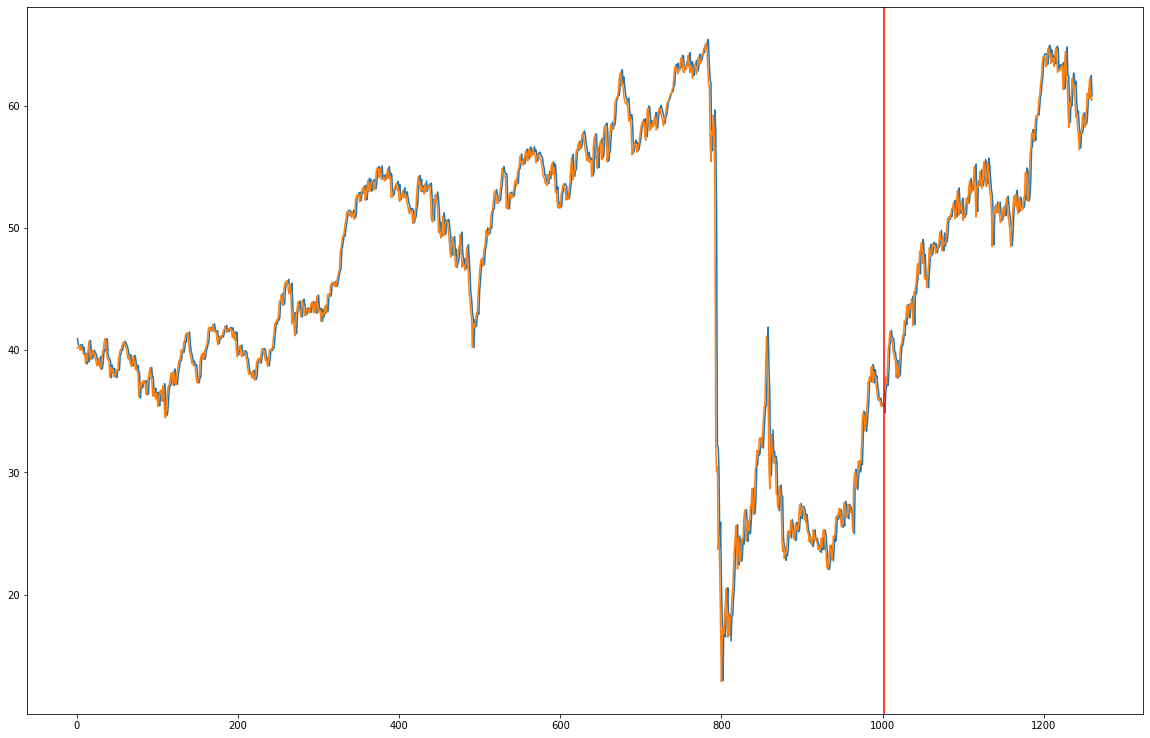

Epoch 1/100
 - 0s - loss: 11.2355
Epoch 2/100
 - 0s - loss: 10.5249
Epoch 3/100
 - 0s - loss: 10.4823
Epoch 4/100
 - 0s - loss: 9.7750
Epoch 5/100
 - 0s - loss: 10.2459
Epoch 6/100
 - 0s - loss: 10.2179
Epoch 7/100
 - 0s - loss: 10.0844
Epoch 8/100
 - 0s - loss: 9.6977
Epoch 9/100
 - 0s - loss: 10.3008
Epoch 10/100
 - 0s - loss: 9.9512
Epoch 11/100
 - 0s - loss: 10.3714
Epoch 12/100
 - 0s - loss: 10.2081
Epoch 13/100
 - 0s - loss: 9.8431
Epoch 14/100
 - 0s - loss: 9.9550
Epoch 15/100
 - 0s - loss: 9.8599
Epoch 16/100
 - 0s - loss: 10.0347
Epoch 17/100
 - 0s - loss: 10.1567
Epoch 18/100
 - 0s - loss: 9.3402
Epoch 19/100
 - 0s - loss: 10.0288
Epoch 20/100
 - 0s - loss: 10.2714
Epoch 21/100
 - 0s - loss: 10.0514
Epoch 22/100
 - 0s - loss: 9.7565
Epoch 23/100
 - 0s - loss: 10.0970
Epoch 24/100
 - 0s - loss: 9.7086
Epoch 25/100
 - 0s - loss: 9.9662
Epoch 26/100
 - 0s - loss: 9.9096
Epoch 27/100
 - 0s - loss: 9.8810
Epoch 28/100
 - 0s - loss: 9.6902
Epoch 29/100
 - 0s - loss: 10.1828
Epoch 3

KeyboardInterrupt: 

In [143]:
#apply the modeling for all stocks
for stock in candidate_stocks:
    values=df['Close'][stock].dropna().values

    train,test = values[0:1000], values[1000:]
    test = np.append(test,np.repeat(test[-1,],step))
    train = np.append(train,np.repeat(train[-1,],step))
    step=3
    trainX,trainY =convertToMatrix(train,step)
    testX,testY =convertToMatrix(test,step)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
    trainPredict = model.predict(trainX)
    testPredict= model.predict(testX)
    predicted=np.concatenate((trainPredict,testPredict),axis=0)
    d=df['Close'][stock].reset_index().dropna()
    d=d.drop(columns='Date')
    index = d.index.values
    plt.rcParams["figure.figsize"] = (20,13)
    plt.plot(index,d)
    plt.plot(index,predicted)
    plt.axvline(d.index[1000], c="r")
    plt.show() 

1258

C:\Users\Azzam\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3730.690, Time=2.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3748.401, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3740.833, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3741.282, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3746.673, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3735.782, Time=1.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3735.835, Time=1.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3732.384, Time=2.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3732.396, Time=2.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3734.575, Time=0.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3736.997, Time=1.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3736.494, Time=1.72 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.85 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3728.815, Time=0.88 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

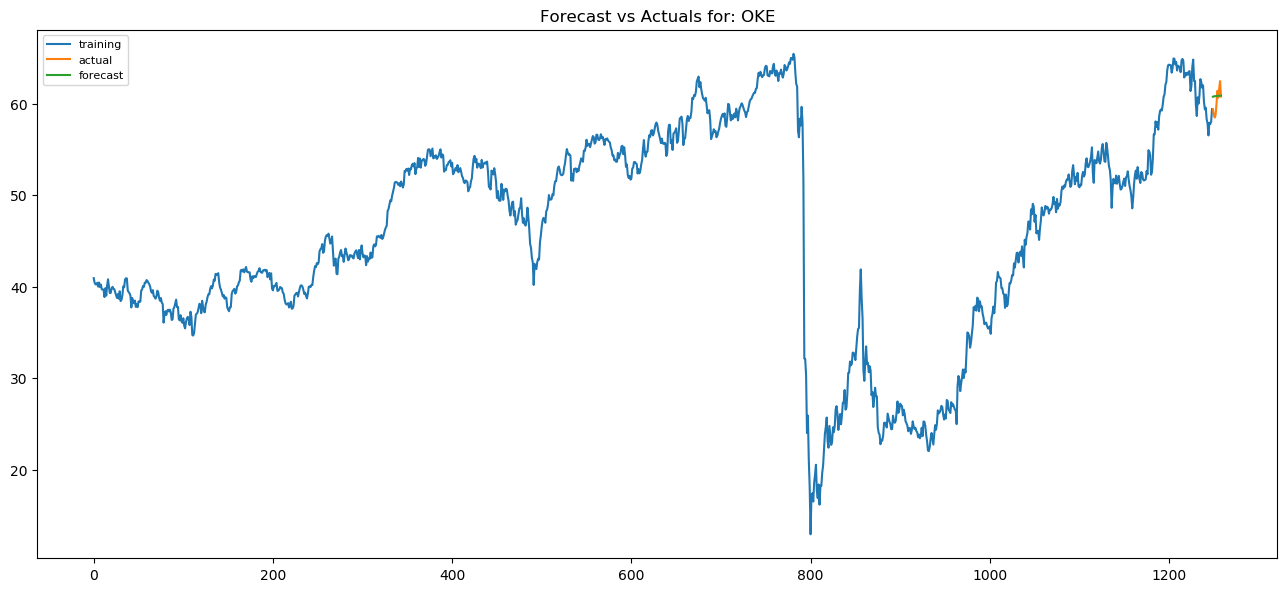

C:\Users\Azzam\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6075.640, Time=1.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6135.905, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6120.961, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6124.417, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6134.948, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6095.540, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6104.922, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6077.606, Time=1.86 sec


KeyboardInterrupt: 

In [240]:
for stock in candidate_stocks:
    DF=df['Close'][stock].dropna()
    l=len(DF)
    stepwise_fit = auto_arima(DF,
    seasonal=False,
    m=12,
    trace=True,
    error_action='ignore',   # we don't want to know if an order does not work
    suppress_warnings=True,  # we don't want convergence warnings
    stepwise=True)           # set to stepwise

    #ARIMA_model = ARIMA(df['Close']['AAL'].dropna(),order=(0,1,1))
    #model_fit = ARIMA_model.fit(disp=0)
    train = pd.Series(DF[:l-10].values)
    test = pd.Series(DF[l-10:].values,index=DF.reset_index().index.values[l-10:])
    #model = ARIMA(train, order=(0, 1, 1))  
    #fitted = stepwise_fit.fit(disp=-1)  


    fc= stepwise_fit.predict(10, alpha=0.05)  


    fc_series = pd.Series(fc, index=DF.reset_index().index.values[l-10:])
    #lower_series = pd.Series(conf[:, 0], index=DF.reset_index().index.values[l-10:])
    #upper_series = pd.Series(conf[:, 1], index=DF.reset_index().index.values[l-10:])

    # Plot
    plt.figure(figsize=(16,7), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    #plt.fill_between(lower_series.index, lower_series, upper_series, 
    #color='k', alpha=.15)
    plt.title('Forecast vs Actuals for: '+stock )
    plt.legend(loc='upper left', fontsize=8)
    plt.show()